In [9]:
import sys
sys.path.insert(0,'..')

from nets.core import train_model, prune_neurons, grow_neurons, get_layer_sizes, initialize_parameters, get_param_string, train_dynamic_model
from nets.datasets import mnist_3, fashion_mnist_tshirt
from nets.utils import measure_accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [2]:
X_train_m, X_test_m, y_train_m, y_test_m = mnist_3()

In [3]:
X_train_m.shape, y_train_m.shape, X_test_m.shape, y_test_m.shape

((784, 33600), (1, 33600), (784, 8400), (1, 8400))

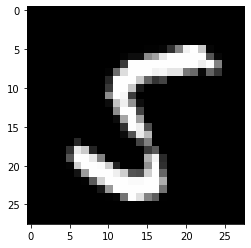

In [4]:
pixels = X_train_m[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = fashion_mnist_tshirt()

In [6]:
X_train_fm.shape, y_train_fm.shape, X_test_fm.shape, y_test_fm.shape

((784, 48000), (1, 48000), (784, 12000), (1, 12000))

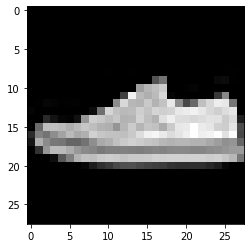

In [7]:
pixels = X_train_fm[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Train the model

In [6]:
layers_dims = [784, 20, 20, 1]

In [147]:
parameters_unreg = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0, num_epochs=30, print_cost=True)

Cost after epoch 0: 0.430815
Cost after epoch 1: 0.407259
Cost after epoch 2: 0.406516
Cost after epoch 3: 0.408454
Cost after epoch 4: 0.410047
Cost after epoch 5: 0.410788
Cost after epoch 6: 0.410328
Cost after epoch 7: 0.406868
Cost after epoch 8: 0.393573
Cost after epoch 9: 0.362331
Cost after epoch 10: 0.317457
Cost after epoch 11: 0.279190
Cost after epoch 12: 0.236498
Cost after epoch 13: 0.149960
Cost after epoch 14: 0.104616
Cost after epoch 15: 0.093431
Cost after epoch 16: 0.087492
Cost after epoch 17: 0.083259
Cost after epoch 18: 0.080126
Cost after epoch 19: 0.077734
Cost after epoch 20: 0.075829
Cost after epoch 21: 0.074281
Cost after epoch 22: 0.072976
Cost after epoch 23: 0.071847
Cost after epoch 24: 0.070862
Cost after epoch 25: 0.069997
Cost after epoch 26: 0.069224
Cost after epoch 27: 0.068522
Cost after epoch 28: 0.067895
Cost after epoch 29: 0.067314


In [148]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_unreg)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9755357142857143

In [145]:
parameters_reg = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0.01, num_epochs=30, print_cost=True)

Cost after epoch 0: 0.448906
Cost after epoch 1: 0.423507
Cost after epoch 2: 0.421041
Cost after epoch 3: 0.421441
Cost after epoch 4: 0.421764
Cost after epoch 5: 0.421659
Cost after epoch 6: 0.421221
Cost after epoch 7: 0.420585
Cost after epoch 8: 0.419848
Cost after epoch 9: 0.419061
Cost after epoch 10: 0.418218
Cost after epoch 11: 0.417216
Cost after epoch 12: 0.415717
Cost after epoch 13: 0.412344
Cost after epoch 14: 0.402713
Cost after epoch 15: 0.380030
Cost after epoch 16: 0.339927
Cost after epoch 17: 0.303582
Cost after epoch 18: 0.273109
Cost after epoch 19: 0.246411
Cost after epoch 20: 0.223080
Cost after epoch 21: 0.203517
Cost after epoch 22: 0.185436
Cost after epoch 23: 0.167289
Cost after epoch 24: 0.142887
Cost after epoch 25: 0.113212
Cost after epoch 26: 0.098133
Cost after epoch 27: 0.092885
Cost after epoch 28: 0.090363
Cost after epoch 29: 0.088437


In [146]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_reg)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9736607142857143

In [59]:
parameters_scaled = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0.02, self_scale=True, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.448215
Cost after epoch 1: 0.422285
Cost after epoch 2: 0.419419
Cost after epoch 3: 0.419546
Cost after epoch 4: 0.419713
Cost after epoch 5: 0.419547
Cost after epoch 6: 0.419121
Cost after epoch 7: 0.418531
Cost after epoch 8: 0.417825
Cost after epoch 9: 0.416959
Cost after epoch 10: 0.415629
Cost after epoch 11: 0.413236
Cost after epoch 12: 0.410141
Cost after epoch 13: 0.403526
Cost after epoch 14: 0.386231
Cost after epoch 15: 0.349768
Cost after epoch 16: 0.299857
Cost after epoch 17: 0.187668
Cost after epoch 18: 0.121146
Cost after epoch 19: 0.106763
Cost after epoch 20: 0.099291
Cost after epoch 21: 0.094234
Cost after epoch 22: 0.090470
Cost after epoch 23: 0.087580
Cost after epoch 24: 0.085306
Cost after epoch 25: 0.083472
Cost after epoch 26: 0.081934
Cost after epoch 27: 0.080627
Cost after epoch 28: 0.079499
Cost after epoch 29: 0.078535
Cost after epoch 30: 0.077693
Cost after epoch 31: 0.076980
Cost after epoch 32: 0.076358
Cost after epoch 33:

In [60]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_scaled)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9853273809523809

In [61]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 8, 12, 1]

In [62]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_pruned)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9853273809523809

In [63]:
parameters = L_layer_model(X_train, y_train, get_layer_sizes(parameters_pruned), learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.431117
Cost after epoch 1: 0.407389
Cost after epoch 2: 0.406448
Cost after epoch 3: 0.408345
Cost after epoch 4: 0.410126
Cost after epoch 5: 0.411401
Cost after epoch 6: 0.412244
Cost after epoch 7: 0.412780
Cost after epoch 8: 0.413115
Cost after epoch 9: 0.413321
Cost after epoch 10: 0.413444
Cost after epoch 11: 0.413513
Cost after epoch 12: 0.413546
Cost after epoch 13: 0.413552
Cost after epoch 14: 0.413534
Cost after epoch 15: 0.413488
Cost after epoch 16: 0.413402
Cost after epoch 17: 0.413240
Cost after epoch 18: 0.412923
Cost after epoch 19: 0.412322
Cost after epoch 20: 0.411303
Cost after epoch 21: 0.409002
Cost after epoch 22: 0.402787
Cost after epoch 23: 0.383750
Cost after epoch 24: 0.334164
Cost after epoch 25: 0.208864
Cost after epoch 26: 0.124095
Cost after epoch 27: 0.105026
Cost after epoch 28: 0.095823
Cost after epoch 29: 0.089813
Cost after epoch 30: 0.085375
Cost after epoch 31: 0.081924
Cost after epoch 32: 0.079218
Cost after epoch 33:

In [64]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9823809523809524

# Keeping parameters

In [ ]:
layers_dims = [784, 20, 20, 1]

In [82]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.430815
Cost after epoch 1: 0.407259
Cost after epoch 2: 0.406516
Cost after epoch 3: 0.408454
Cost after epoch 4: 0.410047
Cost after epoch 5: 0.410788
Cost after epoch 6: 0.410328
Cost after epoch 7: 0.406868
Cost after epoch 8: 0.393573
Cost after epoch 9: 0.362331
Cost after epoch 10: 0.317457
Cost after epoch 11: 0.279190
Cost after epoch 12: 0.236498
Cost after epoch 13: 0.149960
Cost after epoch 14: 0.104616
Cost after epoch 15: 0.093431
Cost after epoch 16: 0.087492
Cost after epoch 17: 0.083259
Cost after epoch 18: 0.080126
Cost after epoch 19: 0.077734
Cost after epoch 20: 0.075829
Cost after epoch 21: 0.074281
Cost after epoch 22: 0.072976
Cost after epoch 23: 0.071847
Cost after epoch 24: 0.070862
Cost after epoch 25: 0.069997
Cost after epoch 26: 0.069224
Cost after epoch 27: 0.068522
Cost after epoch 28: 0.067895
Cost after epoch 29: 0.067314
Cost after epoch 30: 0.066769
Cost after epoch 31: 0.066249
Cost after epoch 32: 0.065738
Cost after epoch 33:

In [83]:
measure_accuracy(parameters, X_train, y_train)

0.9906845238095238

In [84]:
measure_accuracy(parameters, X_test, y_test)

0.9864285714285714

In [86]:
layers_dims_small = [784, 11, 14, 1]

In [87]:
parameters = initialize_parameters(layers_dims_small)
parameters_small = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.431119
Cost after epoch 1: 0.407392
Cost after epoch 2: 0.406453
Cost after epoch 3: 0.408351
Cost after epoch 4: 0.410132
Cost after epoch 5: 0.411408
Cost after epoch 6: 0.412251
Cost after epoch 7: 0.412789
Cost after epoch 8: 0.413124
Cost after epoch 9: 0.413329
Cost after epoch 10: 0.413451
Cost after epoch 11: 0.413520
Cost after epoch 12: 0.413550
Cost after epoch 13: 0.413549
Cost after epoch 14: 0.413519
Cost after epoch 15: 0.413448
Cost after epoch 16: 0.413308
Cost after epoch 17: 0.413034
Cost after epoch 18: 0.412481
Cost after epoch 19: 0.411448
Cost after epoch 20: 0.409207
Cost after epoch 21: 0.403088
Cost after epoch 22: 0.383622
Cost after epoch 23: 0.322974
Cost after epoch 24: 0.168219
Cost after epoch 25: 0.118703
Cost after epoch 26: 0.103595
Cost after epoch 27: 0.095517
Cost after epoch 28: 0.090004
Cost after epoch 29: 0.085756
Cost after epoch 30: 0.082504
Cost after epoch 31: 0.079982
Cost after epoch 32: 0.078035
Cost after epoch 33:

In [88]:
measure_accuracy(parameters_small, X_train, y_train)

0.9866964285714286

In [89]:
measure_accuracy(parameters_small, X_test, y_test)

0.9826190476190476

In [76]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.02, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.448215
Cost after epoch 1: 0.422285
Cost after epoch 2: 0.419419
Cost after epoch 3: 0.419546
Cost after epoch 4: 0.419713
Cost after epoch 5: 0.419547
Cost after epoch 6: 0.419121
Cost after epoch 7: 0.418531
Cost after epoch 8: 0.417825
Cost after epoch 9: 0.416959
Cost after epoch 10: 0.415629
Cost after epoch 11: 0.413236
Cost after epoch 12: 0.410141
Cost after epoch 13: 0.403526
Cost after epoch 14: 0.386231
Cost after epoch 15: 0.349768
Cost after epoch 16: 0.299857
Cost after epoch 17: 0.187668
Cost after epoch 18: 0.121146
Cost after epoch 19: 0.106763
Cost after epoch 20: 0.099291
Cost after epoch 21: 0.094234
Cost after epoch 22: 0.090470
Cost after epoch 23: 0.087580
Cost after epoch 24: 0.085306
Cost after epoch 25: 0.083472
Cost after epoch 26: 0.081934
Cost after epoch 27: 0.080627
Cost after epoch 28: 0.079499
Cost after epoch 29: 0.078535
Cost after epoch 30: 0.077693
Cost after epoch 31: 0.076980
Cost after epoch 32: 0.076358
Cost after epoch 33:

In [78]:
measure_accuracy(parameters_scaled, X_train, y_train)

0.976547619047619

In [77]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 11, 14, 1]

In [79]:
measure_accuracy(parameters_pruned, X_train, y_train)

0.976547619047619

In [80]:
parameters_final = train_model(X_train, y_train, parameters_pruned, learning_rate=0.01, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.068162
Cost after epoch 1: 0.068107
Cost after epoch 2: 0.067846
Cost after epoch 3: 0.067470
Cost after epoch 4: 0.067049
Cost after epoch 5: 0.066743
Cost after epoch 6: 0.066580
Cost after epoch 7: 0.065768
Cost after epoch 8: 0.065288
Cost after epoch 9: 0.064633
Cost after epoch 10: 0.063909
Cost after epoch 11: 0.063855
Cost after epoch 12: 0.063281
Cost after epoch 13: 0.063048
Cost after epoch 14: 0.063028
Cost after epoch 15: 0.063694
Cost after epoch 16: 0.062957
Cost after epoch 17: 0.057640
Cost after epoch 18: 0.053005
Cost after epoch 19: 0.049765
Cost after epoch 20: 0.047411
Cost after epoch 21: 0.043448
Cost after epoch 22: 0.039785
Cost after epoch 23: 0.036768
Cost after epoch 24: 0.034182
Cost after epoch 25: 0.032045
Cost after epoch 26: 0.029961
Cost after epoch 27: 0.028210
Cost after epoch 28: 0.026672
Cost after epoch 29: 0.024867
Cost after epoch 30: 0.023336
Cost after epoch 31: 0.022010
Cost after epoch 32: 0.020892
Cost after epoch 33:

In [81]:
measure_accuracy(parameters_final, X_train, y_train)

0.9891666666666666

In [85]:
measure_accuracy(parameters_final, X_test, y_test)

0.9841666666666666

In [98]:
layers_dims

[784, 20, 20, 1]

# Agnosticity about initial number of neurons

In [115]:
layers_dims = [784, 20, 20, 1]

In [116]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.001, self_scale=True, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.447466
Cost after epoch 1: 0.421750
Cost after epoch 2: 0.419062
Cost after epoch 3: 0.419331
Cost after epoch 4: 0.419606
Cost after epoch 5: 0.419520
Cost after epoch 6: 0.419143
Cost after epoch 7: 0.418580
Cost after epoch 8: 0.417862
Cost after epoch 9: 0.416916
Cost after epoch 10: 0.415325
Cost after epoch 11: 0.412548
Cost after epoch 12: 0.408499
Cost after epoch 13: 0.398863
Cost after epoch 14: 0.374069
Cost after epoch 15: 0.331510
Cost after epoch 16: 0.272481
Cost after epoch 17: 0.147786
Cost after epoch 18: 0.114804
Cost after epoch 19: 0.103948
Cost after epoch 20: 0.097586
Cost after epoch 21: 0.093109
Cost after epoch 22: 0.089724
Cost after epoch 23: 0.087075
Cost after epoch 24: 0.084956
Cost after epoch 25: 0.083225
Cost after epoch 26: 0.081775
Cost after epoch 27: 0.080528
Cost after epoch 28: 0.079445
Cost after epoch 29: 0.078504
Cost after epoch 30: 0.077669
Cost after epoch 31: 0.076941
Cost after epoch 32: 0.076331
Cost after epoch 33:

In [117]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 8, 12, 1]

In [118]:
layers_dims = [784, 100, 100, 1]

In [119]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.001, self_scale=True, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.690337
Cost after epoch 1: 0.528154
Cost after epoch 2: 0.467875
Cost after epoch 3: 0.443347
Cost after epoch 4: 0.430120
Cost after epoch 5: 0.416833
Cost after epoch 6: 0.389002
Cost after epoch 7: 0.338527
Cost after epoch 8: 0.300451
Cost after epoch 9: 0.271006
Cost after epoch 10: 0.245603
Cost after epoch 11: 0.224083
Cost after epoch 12: 0.205855
Cost after epoch 13: 0.190307
Cost after epoch 14: 0.176630
Cost after epoch 15: 0.163583
Cost after epoch 16: 0.150328
Cost after epoch 17: 0.134241
Cost after epoch 18: 0.114823
Cost after epoch 19: 0.100922
Cost after epoch 20: 0.094499
Cost after epoch 21: 0.091466
Cost after epoch 22: 0.089254
Cost after epoch 23: 0.087176
Cost after epoch 24: 0.085483
Cost after epoch 25: 0.083792
Cost after epoch 26: 0.082154
Cost after epoch 27: 0.080512
Cost after epoch 28: 0.079083
Cost after epoch 29: 0.077673
Cost after epoch 30: 0.076255
Cost after epoch 31: 0.074938
Cost after epoch 32: 0.073707
Cost after epoch 33:

In [120]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 10, 16, 1]

In [121]:
layers_dims = [784, 300, 300, 1]

In [122]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.001, self_scale=True, num_epochs=100, print_cost=True)

Cost after epoch 0: 1.098841
Cost after epoch 1: 0.587784
Cost after epoch 2: 0.494406
Cost after epoch 3: 0.463500
Cost after epoch 4: 0.449631
Cost after epoch 5: 0.442349
Cost after epoch 6: 0.437789
Cost after epoch 7: 0.434503
Cost after epoch 8: 0.430655
Cost after epoch 9: 0.423373
Cost after epoch 10: 0.402940
Cost after epoch 11: 0.359627
Cost after epoch 12: 0.318269
Cost after epoch 13: 0.287682
Cost after epoch 14: 0.261287
Cost after epoch 15: 0.238261
Cost after epoch 16: 0.217529
Cost after epoch 17: 0.198610
Cost after epoch 18: 0.177072
Cost after epoch 19: 0.146617
Cost after epoch 20: 0.118679
Cost after epoch 21: 0.108829
Cost after epoch 22: 0.105467
Cost after epoch 23: 0.103294
Cost after epoch 24: 0.101530
Cost after epoch 25: 0.100046
Cost after epoch 26: 0.098677
Cost after epoch 27: 0.097494
Cost after epoch 28: 0.096385
Cost after epoch 29: 0.095460
Cost after epoch 30: 0.094646
Cost after epoch 31: 0.093996
Cost after epoch 32: 0.093388
Cost after epoch 33:

In [123]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 6, 17, 1]

In [139]:
layers_dims = [784, 30, 30, 30, 30, 1]

In [140]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.114727
Cost after epoch 1: 0.081783
Cost after epoch 2: 0.075709
Cost after epoch 3: 0.069597
Cost after epoch 4: 0.064551
Cost after epoch 5: 0.059956
Cost after epoch 6: 0.056500
Cost after epoch 7: 0.051898
Cost after epoch 8: 0.046910
Cost after epoch 9: 0.042092
Cost after epoch 10: 0.037787
Cost after epoch 11: 0.032170
Cost after epoch 12: 0.027723
Cost after epoch 13: 0.024651
Cost after epoch 14: 0.022567
Cost after epoch 15: 0.021222
Cost after epoch 16: 0.019337
Cost after epoch 17: 0.018867
Cost after epoch 18: 0.017991
Cost after epoch 19: 0.017021
Cost after epoch 20: 0.015905
Cost after epoch 21: 0.016125
Cost after epoch 22: 0.014952
Cost after epoch 23: 0.014667
Cost after epoch 24: 0.014038
Cost after epoch 25: 0.014479
Cost after epoch 26: 0.013676
Cost after epoch 27: 0.014447
Cost after epoch 28: 0.013044
Cost after epoch 29: 0.012780
Cost after epoch 30: 0.013172
Cost after epoch 31: 0.012147
Cost after epoch 32: 0.012007
Cost after epoch 33:

In [141]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 1.204507
Cost after epoch 1: 0.702536
Cost after epoch 2: 0.465317
Cost after epoch 3: 0.324011
Cost after epoch 4: 0.239803
Cost after epoch 5: 0.186542
Cost after epoch 6: 0.152760
Cost after epoch 7: 0.128173
Cost after epoch 8: 0.112982
Cost after epoch 9: 0.102243
Cost after epoch 10: 0.094568
Cost after epoch 11: 0.088688
Cost after epoch 12: 0.085035
Cost after epoch 13: 0.082324
Cost after epoch 14: 0.079405
Cost after epoch 15: 0.077286
Cost after epoch 16: 0.074538
Cost after epoch 17: 0.071969
Cost after epoch 18: 0.070912
Cost after epoch 19: 0.070955
Cost after epoch 20: 0.068474
Cost after epoch 21: 0.068026
Cost after epoch 22: 0.064792
Cost after epoch 23: 0.063738
Cost after epoch 24: 0.063600
Cost after epoch 25: 0.064194
Cost after epoch 26: 0.063469
Cost after epoch 27: 0.063158
Cost after epoch 28: 0.059186
Cost after epoch 29: 0.060481
Cost after epoch 30: 0.056796
Cost after epoch 31: 0.055693
Cost after epoch 32: 0.056462
Cost after epoch 33:

In [142]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 26, 25, 21, 20, 1]

In [143]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.05, l1_term=0.02, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 1.345815
Cost after epoch 1: 0.600339
Cost after epoch 2: 0.341344
Cost after epoch 3: 0.237412
Cost after epoch 4: 0.191988
Cost after epoch 5: 0.165058
Cost after epoch 6: 0.146758
Cost after epoch 7: 0.134638
Cost after epoch 8: 0.124084
Cost after epoch 9: 0.115949
Cost after epoch 10: 0.108598
Cost after epoch 11: 0.104465
Cost after epoch 12: 0.102160
Cost after epoch 13: 0.100272
Cost after epoch 14: 0.101497
Cost after epoch 15: 0.099944
Cost after epoch 16: 0.099155
Cost after epoch 17: 0.100790
Cost after epoch 18: 0.102140
Cost after epoch 19: 0.104050
Cost after epoch 20: 0.105863
Cost after epoch 21: 0.106246
Cost after epoch 22: 0.106878
Cost after epoch 23: 0.106351
Cost after epoch 24: 0.106943
Cost after epoch 25: 0.105367
Cost after epoch 26: 0.098839
Cost after epoch 27: 0.102132
Cost after epoch 28: 0.102630
Cost after epoch 29: 0.101065
Cost after epoch 30: 0.104618
Cost after epoch 31: 0.105331
Cost after epoch 32: 0.106598
Cost after epoch 33:

In [144]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 27, 28, 27, 27, 1]

In [145]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.05, l1_term=0.05, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 1.064458
Cost after epoch 1: 0.441322
Cost after epoch 2: 0.320645
Cost after epoch 3: 0.270691
Cost after epoch 4: 0.246589
Cost after epoch 5: 0.233894
Cost after epoch 6: 0.225029
Cost after epoch 7: 0.218778
Cost after epoch 8: 0.213735
Cost after epoch 9: 0.210501
Cost after epoch 10: 0.207507
Cost after epoch 11: 0.205485
Cost after epoch 12: 0.203641
Cost after epoch 13: 0.202985
Cost after epoch 14: 0.201595
Cost after epoch 15: 0.200351
Cost after epoch 16: 0.199165
Cost after epoch 17: 0.198939
Cost after epoch 18: 0.198127
Cost after epoch 19: 0.197760
Cost after epoch 20: 0.197054
Cost after epoch 21: 0.196521
Cost after epoch 22: 0.195868
Cost after epoch 23: 0.195733
Cost after epoch 24: 0.195140
Cost after epoch 25: 0.195129
Cost after epoch 26: 0.194692
Cost after epoch 27: 0.195037
Cost after epoch 28: 0.194614
Cost after epoch 29: 0.194642
Cost after epoch 30: 0.194371
Cost after epoch 31: 0.194414
Cost after epoch 32: 0.194022
Cost after epoch 33:

In [146]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 28, 28, 29, 29, 1]

In [149]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 1.204507
Cost after epoch 1: 0.702536
Cost after epoch 2: 0.465317
Cost after epoch 3: 0.324011
Cost after epoch 4: 0.239803
Cost after epoch 5: 0.186542
Cost after epoch 6: 0.152760
Cost after epoch 7: 0.128173
Cost after epoch 8: 0.112982
Cost after epoch 9: 0.102243
Cost after epoch 10: 0.094568
Cost after epoch 11: 0.088688
Cost after epoch 12: 0.085035
Cost after epoch 13: 0.082324
Cost after epoch 14: 0.079405
Cost after epoch 15: 0.077286
Cost after epoch 16: 0.074538
Cost after epoch 17: 0.071969
Cost after epoch 18: 0.070912
Cost after epoch 19: 0.070955
Cost after epoch 20: 0.068474
Cost after epoch 21: 0.068026
Cost after epoch 22: 0.064792
Cost after epoch 23: 0.063738
Cost after epoch 24: 0.063600
Cost after epoch 25: 0.064194
Cost after epoch 26: 0.063469
Cost after epoch 27: 0.063158
Cost after epoch 28: 0.059186
Cost after epoch 29: 0.060481
Cost after epoch 30: 0.056796
Cost after epoch 31: 0.055693
Cost after epoch 32: 0.056462
Cost after epoch 33:

In [150]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 26, 25, 21, 20, 1]

In [164]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.02, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 4.127828
Cost after epoch 1: 2.709638
Cost after epoch 2: 2.018991
Cost after epoch 3: 1.609576
Cost after epoch 4: 1.323603
Cost after epoch 5: 1.101633
Cost after epoch 6: 0.927989
Cost after epoch 7: 0.787668
Cost after epoch 8: 0.674160
Cost after epoch 9: 0.583896
Cost after epoch 10: 0.511139
Cost after epoch 11: 0.451040
Cost after epoch 12: 0.400615
Cost after epoch 13: 0.359736
Cost after epoch 14: 0.325274
Cost after epoch 15: 0.297380
Cost after epoch 16: 0.273607
Cost after epoch 17: 0.253748
Cost after epoch 18: 0.236143
Cost after epoch 19: 0.221163
Cost after epoch 20: 0.208015
Cost after epoch 21: 0.197508
Cost after epoch 22: 0.188318
Cost after epoch 23: 0.180100
Cost after epoch 24: 0.172892
Cost after epoch 25: 0.166223
Cost after epoch 26: 0.160022
Cost after epoch 27: 0.154092
Cost after epoch 28: 0.149060
Cost after epoch 29: 0.144098
Cost after epoch 30: 0.139515
Cost after epoch 31: 0.135294
Cost after epoch 32: 0.131436
Cost after epoch 33:

In [166]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 3, 9, 7, 9, 1]

In [167]:
layers_dims = [784, 100, 100, 100, 1]

In [168]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.126844
Cost after epoch 1: 0.092782
Cost after epoch 2: 0.075689
Cost after epoch 3: 0.062928
Cost after epoch 4: 0.053096
Cost after epoch 5: 0.044541
Cost after epoch 6: 0.037548
Cost after epoch 7: 0.031860
Cost after epoch 8: 0.027086
Cost after epoch 9: 0.022841
Cost after epoch 10: 0.019416
Cost after epoch 11: 0.016778
Cost after epoch 12: 0.014743
Cost after epoch 13: 0.012984
Cost after epoch 14: 0.011838
Cost after epoch 15: 0.011144
Cost after epoch 16: 0.010757
Cost after epoch 17: 0.010165
Cost after epoch 18: 0.010187
Cost after epoch 19: 0.009755
Cost after epoch 20: 0.009577
Cost after epoch 21: 0.009350
Cost after epoch 22: 0.009303
Cost after epoch 23: 0.009430
Cost after epoch 24: 0.009113
Cost after epoch 25: 0.009270
Cost after epoch 26: 0.009157
Cost after epoch 27: 0.008850
Cost after epoch 28: 0.009053
Cost after epoch 29: 0.008770
Cost after epoch 30: 0.008207
Cost after epoch 31: 0.008080
Cost after epoch 32: 0.007547
Cost after epoch 33:

In [172]:
measure_accuracy(parameters, X_test, y_test)

0.9901190476190476

In [183]:
parameters_saved = copy.deepcopy(parameters)
parameters_scaled = train_model(X_train, y_train, parameters_saved, learning_rate=0.01, l1_term=0.01, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 16.463566
Cost after epoch 1: 8.052324
Cost after epoch 2: 4.595731
Cost after epoch 3: 2.892695
Cost after epoch 4: 1.967680
Cost after epoch 5: 1.433169
Cost after epoch 6: 1.108886
Cost after epoch 7: 0.900140
Cost after epoch 8: 0.756705
Cost after epoch 9: 0.653801
Cost after epoch 10: 0.577227
Cost after epoch 11: 0.517888
Cost after epoch 12: 0.469832
Cost after epoch 13: 0.429210
Cost after epoch 14: 0.395551
Cost after epoch 15: 0.368202
Cost after epoch 16: 0.344499
Cost after epoch 17: 0.323962
Cost after epoch 18: 0.304922
Cost after epoch 19: 0.288156
Cost after epoch 20: 0.273631
Cost after epoch 21: 0.260428
Cost after epoch 22: 0.248806
Cost after epoch 23: 0.238602
Cost after epoch 24: 0.228801
Cost after epoch 25: 0.219764
Cost after epoch 26: 0.211196
Cost after epoch 27: 0.203943
Cost after epoch 28: 0.196823
Cost after epoch 29: 0.190800
Cost after epoch 30: 0.184650
Cost after epoch 31: 0.179373
Cost after epoch 32: 0.174118
Cost after epoch 33

In [184]:
measure_accuracy(parameters_scaled, X_test, y_test)

0.9839285714285714

In [185]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 7, 11, 17, 1]

In [186]:
measure_accuracy(parameters_pruned, X_test, y_test)

0.9839285714285714

# Growing new neurons

### Tests

In [34]:
layers_dims = [784, 50, 50, 1]

In [35]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.01, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 1.769813
Cost after epoch 1: 0.822762
Cost after epoch 2: 0.499205
Cost after epoch 3: 0.335123
Cost after epoch 4: 0.243161
Cost after epoch 5: 0.187816
Cost after epoch 6: 0.154605
Cost after epoch 7: 0.134401
Cost after epoch 8: 0.120966
Cost after epoch 9: 0.110479
Cost after epoch 10: 0.102513
Cost after epoch 11: 0.096627
Cost after epoch 12: 0.091807
Cost after epoch 13: 0.087793
Cost after epoch 14: 0.084849
Cost after epoch 15: 0.082211
Cost after epoch 16: 0.079238
Cost after epoch 17: 0.075734
Cost after epoch 18: 0.073920
Cost after epoch 19: 0.071928


In [36]:
measure_accuracy(parameters, X_test_fm, y_test_fm)

0.95

In [38]:
parameters_pruned = copy.deepcopy(parameters)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 6, 14, 1]

In [42]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 1.151593
Cost after epoch 1: 0.840384
Cost after epoch 2: 0.627446
Cost after epoch 3: 0.484479
Cost after epoch 4: 0.391068
Cost after epoch 5: 0.327497
Cost after epoch 6: 0.283349
Cost after epoch 7: 0.247628
Cost after epoch 8: 0.220184
Cost after epoch 9: 0.197373
Cost after epoch 10: 0.185319
Cost after epoch 11: 0.171842
Cost after epoch 12: 0.156672
Cost after epoch 13: 0.155646
Cost after epoch 14: 0.147038
Cost after epoch 15: 0.136776
Cost after epoch 16: 0.131508
Cost after epoch 17: 0.124595
Cost after epoch 18: 0.121155
Cost after epoch 19: 0.115291


In [43]:
measure_accuracy(parameters, X_test_fm, y_test_fm)

0.9573333333333334

In [44]:
parameters_pruned = copy.deepcopy(parameters)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 23, 44, 1]

In [45]:
layers_dims = [784, 80, 80, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 2.477578
Cost after epoch 1: 1.513153
Cost after epoch 2: 0.997455
Cost after epoch 3: 0.713490
Cost after epoch 4: 0.540119
Cost after epoch 5: 0.427513
Cost after epoch 6: 0.346723
Cost after epoch 7: 0.287211
Cost after epoch 8: 0.243639
Cost after epoch 9: 0.210163
Cost after epoch 10: 0.184236
Cost after epoch 11: 0.165356
Cost after epoch 12: 0.148002
Cost after epoch 13: 0.138234
Cost after epoch 14: 0.126121
Cost after epoch 15: 0.118631
Cost after epoch 16: 0.112155
Cost after epoch 17: 0.104384
Cost after epoch 18: 0.101081
Cost after epoch 19: 0.095689


In [46]:
measure_accuracy(parameters, X_test_fm, y_test_fm)

0.956

In [47]:
parameters_pruned = copy.deepcopy(parameters)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 24, 44, 1]

### Test growing new neurons

In [131]:
layers_dims = [784, 10, 10, 1]
parameters = initialize_parameters(layers_dims)

In [132]:
N_ITERATIONS = 30

iteration = 1
while iteration <= N_ITERATIONS:
    parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=5, print_cost=True)
    print(f"Iteration {iteration}: accuracy {measure_accuracy(parameters, X_test_fm, y_test_fm)}")
    prune_neurons(parameters)
    print(f"After pruning: {get_layer_sizes(parameters)}")
    print(get_param_string(parameters['W1']))
    print(get_param_string(parameters['W2']))
    grow_neurons(parameters)
    iteration += 1
    print("-------------------")

Cost after epoch 0: 0.085681
Cost after epoch 1: 0.086527
Cost after epoch 2: 0.087170
Cost after epoch 3: 0.086224
Cost after epoch 4: 0.081520
Iteration 1: accuracy 0.9575833333333333
After pruning: [784, 10, 10, 1]
1111111111
1101101100
-------------------
Cost after epoch 0: 0.144382
Cost after epoch 1: 0.134815
Cost after epoch 2: 0.130570
Cost after epoch 3: 0.122938
Cost after epoch 4: 0.116384
Iteration 2: accuracy 0.9589166666666666
After pruning: [784, 15, 15, 1]
111111111111111
110110110010111
-------------------
Cost after epoch 0: 0.194046
Cost after epoch 1: 0.176913
Cost after epoch 2: 0.160216
Cost after epoch 3: 0.146772
Cost after epoch 4: 0.133716
Iteration 3: accuracy 0.9596666666666667
After pruning: [784, 20, 20, 1]
11111111111111111111
11011011001011111111
-------------------
Cost after epoch 0: 0.230100
Cost after epoch 1: 0.199539
Cost after epoch 2: 0.175351
Cost after epoch 3: 0.153770
Cost after epoch 4: 0.137434
Iteration 4: accuracy 0.9611666666666666
Afte

In [133]:
measure_accuracy(parameters, X_test_fm, y_test_fm)

0.9620833333333333

In [150]:
layers_dims = [784, 10, 10, 1]
parameters = initialize_parameters(layers_dims)

In [151]:
N_ITERATIONS = 15

iteration = 1
while iteration <= N_ITERATIONS:
    parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=5, print_cost=True)
    print(f"Iteration {iteration}: accuracy {measure_accuracy(parameters, X_test_fm, y_test_fm)}")
    prune_neurons(parameters)
    print(f"After pruning: {get_layer_sizes(parameters)}")
    print(get_param_string(parameters['W1']))
    print(get_param_string(parameters['W2']))
    grow_neurons(parameters)
    iteration += 1
    print("-------------------")

Cost after epoch 0: 0.085681
Cost after epoch 1: 0.086527
Cost after epoch 2: 0.087170
Cost after epoch 3: 0.086224
Cost after epoch 4: 0.081520
Iteration 1: accuracy 0.9575833333333333
After pruning: [784, 10, 10, 1]
1111111111
1101101100
-------------------
Cost after epoch 0: 0.140475
Cost after epoch 1: 0.133170
Cost after epoch 2: 0.126135
Cost after epoch 3: 0.118665
Cost after epoch 4: 0.113032
Iteration 2: accuracy 0.9583333333333334
After pruning: [784, 15, 15, 1]
111111111111111
110110110010111
-------------------
Cost after epoch 0: 0.188402
Cost after epoch 1: 0.169423
Cost after epoch 2: 0.153177
Cost after epoch 3: 0.139304
Cost after epoch 4: 0.126461
Iteration 3: accuracy 0.96
After pruning: [784, 20, 20, 1]
11111111111111111111
11011111001011111111
-------------------
Cost after epoch 0: 0.218235
Cost after epoch 1: 0.189238
Cost after epoch 2: 0.162985
Cost after epoch 3: 0.141474
Cost after epoch 4: 0.127906
Iteration 4: accuracy 0.9604166666666667
After pruning: [78

In [152]:
measure_accuracy(parameters, X_test_fm, y_test_fm)

0.9634166666666667

In [154]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)

In [155]:
N_ITERATIONS = 15

iteration = 1
while iteration <= N_ITERATIONS:
    parameters = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=5, print_cost=True)
    print(f"Iteration {iteration}: accuracy {measure_accuracy(parameters, X_test_fm, y_test_fm)}")
    prune_neurons(parameters)
    print(f"After pruning: {get_layer_sizes(parameters)}")
    print(get_param_string(parameters['W1']))
    print(get_param_string(parameters['W2']))
    grow_neurons(parameters)
    iteration += 1
    print("-------------------")

Cost after epoch 0: 3.471439
Cost after epoch 1: 1.922243
Cost after epoch 2: 1.201067
Cost after epoch 3: 0.824852
Cost after epoch 4: 0.598112
Iteration 1: accuracy 0.95225
After pruning: [784, 76, 100, 1]
1111111111111111111111111211112222211222222222122222222222222222223233333232
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
Cost after epoch 0: 0.787381
Cost after epoch 1: 0.481168
Cost after epoch 2: 0.330849
Cost after epoch 3: 0.253564
Cost after epoch 4: 0.203022
Iteration 2: accuracy 0.9555
After pruning: [784, 40, 86, 1]
1111111111111112111222121222222232223342
11111111111111111111111111111111111211111121121121112222232222112122211122222112121122
-------------------
Cost after epoch 0: 0.395202
Cost after epoch 1: 0.290077
Cost after epoch 2: 0.219675
Cost after epoch 3: 0.173935
Cost after epoch 4: 0.143470
Iteration 3: accuracy 0.9574166666666667
After pruning: [784, 32, 60, 1]
1111111111122122222222

In [25]:
layers_dims = [784, 10, 10, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=15)

Cost after epoch 0: 0.085681
Cost after epoch 1: 0.086527
Cost after epoch 2: 0.087170
Cost after epoch 3: 0.086224
Cost after epoch 4: 0.081520
Iteration 1: accuracy 0.9614375
After pruning: [784, 10, 10, 1]
1111111111
1101101100
After growing: [784, 15, 15, 1]
111111111122222
110110110021222
-------------------
Cost after epoch 0: 0.085257
Cost after epoch 1: 0.084102
Cost after epoch 2: 0.084540
Cost after epoch 3: 0.082978
Cost after epoch 4: 0.079713
Iteration 2: accuracy 0.9629791666666667
After pruning: [784, 10, 15, 1]
1111111111
110110110022222
After growing: [784, 15, 20, 1]
111111111122222
11011011001111022212
-------------------
Cost after epoch 0: 0.083395
Cost after epoch 1: 0.081184
Cost after epoch 2: 0.078488
Cost after epoch 3: 0.079966
Cost after epoch 4: 0.079318
Iteration 3: accuracy 0.9643541666666666
After pruning: [784, 10, 18, 1]
1111111111
110111110022222222
After growing: [784, 15, 23, 1]
111111111122222
11011111001111011122122
-------------------
Cost after 

### Misc

In [40]:
parameters_grown = copy.deepcopy(parameters)
grow_neurons(parameters_grown)
get_layer_sizes(parameters_grown)

[784, 55, 55, 1]

In [41]:
measure_accuracy(parameters_grown, X_test_fm, y_test_fm)

0.94225

In [31]:
np.amax(np.abs(parameters['W1']), 1)

array([1.88135405e-01, 1.56810175e-01, 1.04703038e-01, 8.28299611e-02,
       1.07520263e-01, 8.37034852e-02, 6.28041245e-02, 1.15417144e-02,
       1.70342579e-02, 3.39344306e-05, 1.68211614e-05, 6.86105072e-03,
       2.93882788e-05, 1.52021028e-01, 3.40702449e-05, 4.85909763e-05,
       3.60227907e-05, 2.64488518e-05, 2.80710082e-05, 2.96848872e-05,
       5.59600558e-05, 3.28096515e-05, 4.03310802e-05, 3.58965466e-05,
       5.52691439e-05, 3.89635513e-05, 6.97411841e-05, 4.68680406e-05,
       8.43032294e-05, 4.52863464e-05, 4.68263008e-05, 9.50175981e-05,
       4.99853766e-05, 5.15488386e-05, 6.80759386e-05, 7.59469178e-05,
       7.08732321e-05, 8.36431089e-05, 6.09872253e-05, 6.09169814e-05,
       8.02464551e-05, 1.21334156e-04, 6.55993052e-05, 6.71381795e-05,
       6.87859427e-05, 7.02525371e-05, 7.17670842e-05, 7.33173887e-05,
       1.08993222e-04, 1.05697766e-04])

In [32]:
np.amax(np.abs(parameters_pruned['W1']), 1)

array([0.18813541, 0.15681018, 0.10470304, 0.08282996, 0.10752026,
       0.08370349, 0.06280412, 0.01154171, 0.01703426, 0.00686105,
       0.15202103])

In [33]:
np.amax(np.abs(parameters_grown['W1']), 1)

array([1.88135405e-01, 1.56810175e-01, 1.04703038e-01, 8.28299611e-02,
       1.07520263e-01, 8.37034852e-02, 6.28041245e-02, 1.15417144e-02,
       1.70342579e-02, 3.39344306e-05, 1.68211614e-05, 6.86105072e-03,
       2.93882788e-05, 1.52021028e-01, 3.40702449e-05, 4.85909763e-05,
       3.60227907e-05, 2.64488518e-05, 2.80710082e-05, 2.96848872e-05,
       5.59600558e-05, 3.28096515e-05, 4.03310802e-05, 3.58965466e-05,
       5.52691439e-05, 3.89635513e-05, 6.97411841e-05, 4.68680406e-05,
       8.43032294e-05, 4.52863464e-05, 4.68263008e-05, 9.50175981e-05,
       4.99853766e-05, 5.15488386e-05, 6.80759386e-05, 7.59469178e-05,
       7.08732321e-05, 8.36431089e-05, 6.09872253e-05, 6.09169814e-05,
       8.02464551e-05, 1.21334156e-04, 6.55993052e-05, 6.71381795e-05,
       6.87859427e-05, 7.02525371e-05, 7.17670842e-05, 7.33173887e-05,
       1.08993222e-04, 1.05697766e-04, 1.91298867e-01, 1.64329661e-01,
       1.65980786e-01, 1.73730644e-01, 1.43663205e-01])

In [68]:
np.amax(np.abs(parameters['W1']), 1)

array([0.32007338, 0.25697969, 0.11349017, 0.22389746, 0.09273798,
       0.06579282, 0.15294784, 0.29413447, 0.04596947, 0.1684799 ,
       0.03404276, 0.04464837, 0.02264445, 0.01531863, 0.02229194,
       0.01553279, 0.08192234, 0.06564125, 0.05663856, 0.06547556,
       0.07166364, 0.1240113 , 0.1060139 , 0.10471427, 0.11869094,
       0.12608902, 0.17478878, 0.17056758, 0.15982424, 0.17759919,
       0.18750009])

In [72]:
list(np.amax(np.abs(parameters['W1']), 1))

[0.3200733808949498,
 0.2569796904940545,
 0.1134901723636843,
 0.2238974611549908,
 0.09273798028993928,
 0.06579282333598734,
 0.15294783663107628,
 0.29413447279437255,
 0.04596947233525969,
 0.16847989925657664,
 0.03404276405047613,
 0.04464837192758895,
 0.022644453435450632,
 0.015318627681445835,
 0.022291943502000866,
 0.015532787932865869,
 0.08192233826306447,
 0.06564125212636458,
 0.05663856166137464,
 0.0654755568688443,
 0.07166364451325653,
 0.12401130156320553,
 0.10601389592721283,
 0.10471426526643295,
 0.11869093611895395,
 0.12608901873243678,
 0.1747887824619456,
 0.17056757784583718,
 0.15982424302328488,
 0.17759918749490203,
 0.1875000906480773]